# Week 4 - 1  Predictive Analysis

In [40]:
import os # changing your working directory(Only dataset directory)
import pandas as pd
os.chdir(r'C:\Users\kishore-lpt\Downloads\datasets')
os.getcwd() #knowing your current directory
infile = pd.read_csv('mtcars.csv')

In [41]:
infile.head()

,CarName,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


           wt       mpg
wt   1.000000 -0.867659
mpg -0.867659  1.000000


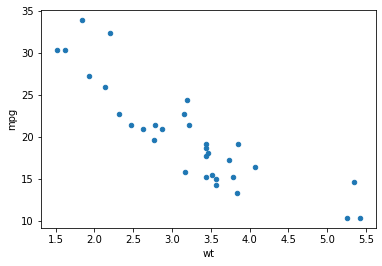

In [42]:
tmpdf= infile.loc[:,['wt','mpg']]
print(tmpdf.corr())
%matplotlib inline
tmpdf.plot.scatter(x='wt',y='mpg')

# Single variable Linear regression

In [43]:
from sklearn.linear_model import LinearRegression
linmod = LinearRegression()
x= infile.loc[:,['wt']] # single variable for linear regression
y= infile['mpg'] # target variable
linmod.fit(x,y) # this is where training model
print(linmod.intercept_ , linmod.coef_) 
# Y = a + b1x1 + b2X2 .... bnxn
# mpg = a + b1*wt
# mpg = a + b1*wt + b2*hp
# intercept is constant , Coef will be vary

37.28512616734204 [-5.34447157]


# Finding R square

In [44]:
from sklearn.metrics import r2_score
predMpg = linmod.predict(x) # Check excel for the better explanation given by karthick
print(predMpg)
r2_score(y,predMpg)
# r2 is to show how well the predicet model given accuracy ?
### r2_score = 0 to 1 (higher the better)

[23.28261065 21.9197704  24.88595212 20.10265006 18.90014396 18.79325453
 18.20536265 20.23626185 20.45004071 18.90014396 18.90014396 15.53312687
 17.3502472  17.08302362  9.22665041  8.29671236  8.71892561 25.52728871
 28.65380458 27.47802083 24.11100374 18.47258623 18.92686632 16.76235533
 16.73563297 26.94357367 25.847957   29.19894068 20.34315128 22.48093991
 18.20536265 22.4274952 ]


0.7528327936582646

# Multivariable Linear regression


In [45]:
# adjusted R2
# R2 and adjusted R2 should be  more slightly near 
# the difrence can be accepted if the both diffrence between 0.5
# why adjusted R2 ? - The R2 might inflated since using unnecessary variable using in X 


In [46]:
# adjusted R2 function
def calc_r2_adj(x,y,predy):
    r2 = r2_score(y,predy)
    n = len(y)
    p = x.shape[1]
    adjr2 = 1 - (1-r2) * (n-1)/ (n-p-1)
    return(r2,adjr2)

calc_r2_adj(x,y,predMpg)

(0.7528327936582646, 0.7445938867802068)

In [47]:
# RFE = Recursive Features Eliminaton
# RFE will identify the importance of Input varaible 


from sklearn.feature_selection import RFE
x = infile.loc[: , ['vs','wt','am','hp','qsec','drat','cyl','gear','carb','disp']]
y= infile['mpg']
lmmod = LinearRegression()
rfemod = RFE(lmmod,1) # iterate each series of input variable and check which is important , 1 = show top 1 , if you put 2 = show top 2 
rfemod.fit(x,y) # 

rankingdf = pd.DataFrame(rfemod.ranking_).T
rankingdf.columns = x.columns
rankingdf

,vs,wt,am,hp,qsec,drat,cyl,gear,carb,disp
0,7,1,2,9,3,4,8,6,5,10


In [50]:
#

linmod = LinearRegression()
x1 = infile.loc[: , ['wt','am','qsec']] # add columns one by one based on RFE report
y1= infile['mpg']
linmod.fit(x1,y1)
predmpg = linmod.predict(x1) #dataframe
print(calc_r2_adj(x1,y1,predmpg))
print(linmod.intercept_ , linmod.coef_) 
linmod
#mpg = 9.6 -3.9*wt + 2.9*am + 1.22*qsec

(0.8496635563617072, 0.8335560802576044)
9.617780514561636 [-3.91650372  2.93583719  1.22588597]


AttributeError: 'numpy.ndarray' object has no attribute 'head'

Determine Business problem 
Target variable is numeric - hence regression
Identify input variables

Explotatory analysis
Target = Numeric , Input variable = Numeric , scatter plot / corr()  to check  if the variable is use ful for modelling

Target = Numeric , Input variable = categorical  , box plot / describe()  to check  if the variable is use ful for modelling

Modeling
Perform RFE with all input variables
Identify Ranking

Add 1 input variable at a time
    Run regression
    Check r2 and adj rs
    r2 should move --> 1 and diff with adj R2 < 0.05

Trade off between high r2 to least number of input variables


    


# WEEK 1 - 2

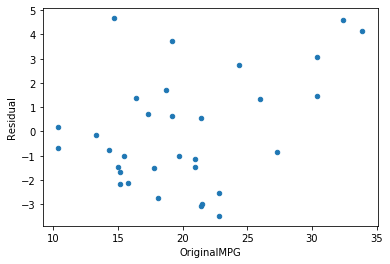

In [60]:
residualdf = pd.DataFrame()
residualdf['OriginalMPG'] = y # orginal target value
residualdf['PredictedMPG'] = predmpg # predicted target value
residualdf['Residual'] = y - predmpg # Diffrence
residualdf = residualdf.sort_values(by='OriginalMPG') # Sorting
%matplotlib inline
residualdf.plot.scatter(x='OriginalMPG',y='Residual')

### DUMMY ENCODING

In [61]:
# Dummy encodig using for convert categorical value to numerical values
# the series of categorical should be less than 10 




In [64]:
infile2 = pd.read_csv('Carsdata.csv')
infile2.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [66]:
numdf = infile2.loc[:,['Price','Mileage','Cylinder','Liter','Doors','Cruise','Leather','Sound']]
catgdf = infile2.loc[:,['Make','Type']]
dummydf = pd.get_dummies(catgdf)
indata = pd.concat([numdf,dummydf],axis=1) # axis = 1 for concat , By default its append(One set below append)
indata.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Leather,Sound,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.10313,8221,6,3.1,4,1,1,1,1,0,0,0,0,0,0,0,0,1,0
1,17542.03608,9135,6,3.1,4,1,0,1,1,0,0,0,0,0,0,0,0,1,0
2,16218.84786,13196,6,3.1,4,1,0,1,1,0,0,0,0,0,0,0,0,1,0
3,16336.91314,16342,6,3.1,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,16339.17032,19832,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Find out price 

1. Import Packages / Run RFE - get ranking
2. Created a model with just top variable - Check r2 and adj r2
3. Add 1 variable at a time and keep checking r2 and adj r2
4. After selecting your best model - create residual plot
5. Interpret your results
